In [2]:
import numpy as np
import DA as da
import ForwardSelection as fs
import gendata 
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

# source

In [3]:
n_s = 100
#k = 4
true_beta_s = [3, 1, 0., 4, 1.4, 0, 1.3]
p_s = len(true_beta_s)

In [7]:
Xs, ys = gendata.generate(n_s, p_s, true_beta_s)
Xs

array([[4.52347872e+00, 5.68867418e+00, 4.57803731e+00, 6.45492568e+00,
        6.17907195e+00, 7.66242956e+00, 7.11239902e+00],
       [1.55044973e+00, 5.94558263e+00, 4.24459701e-01, 6.63590442e+00,
        7.39054422e+00, 1.24808878e+00, 8.70338569e+00],
       [6.22535407e+00, 5.50060663e+00, 9.97483144e+00, 2.78330184e+00,
        6.86470671e+00, 7.87891207e+00, 5.17200372e+00],
       [3.26062502e-01, 7.38555204e+00, 9.70808819e+00, 5.01258404e+00,
        7.90991236e+00, 6.04207651e+00, 3.27785913e+00],
       [8.43484912e+00, 2.67166741e+00, 8.04375712e+00, 7.67983408e+00,
        8.12143701e+00, 8.06084992e+00, 9.32901561e+00],
       [1.79472580e+00, 1.56954263e+00, 3.28335872e+00, 1.32919253e+00,
        7.49223334e+00, 4.49007847e+00, 8.32436166e+00],
       [8.60108260e-01, 9.19627015e-01, 4.33199262e+00, 8.25294893e+00,
        6.37311924e+00, 2.34213374e+00, 6.55200991e+00],
       [3.11375789e-02, 4.59616884e+00, 9.79440659e+00, 5.66573073e+00,
        8.04577666e+00, 8

Text(0, 0.5, 'Target Y')

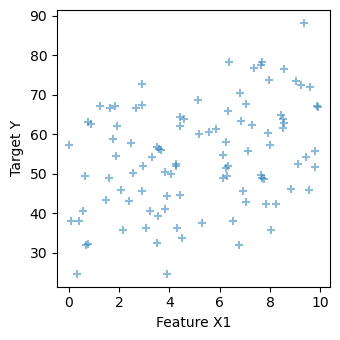

In [24]:
# Set the figure size
plt.rcParams["figure.figsize"] = [3.5, 3.5]
plt.rcParams["figure.autolayout"] = True


# Scatter plot
plt.scatter(Xs[:, 0], ys,marker='+',alpha=0.5)
plt.xlabel("Feature X1")
plt.ylabel("Target Y")
#plt.show()


# target

In [25]:
n_t = 80
#k = 4
#[3, 1, 0.3, 4, 1.4, 2, 1.3]
true_beta_t =[3, 1, 0., 4, 1.4, 0, 1.3]# [2.9, 1.2, 0.3, 3.9, 1.2, 2.05, 1]
p_t = len(true_beta_t)

In [26]:
Xt, yt = gendata.generate(n_t, p_t, true_beta_t)

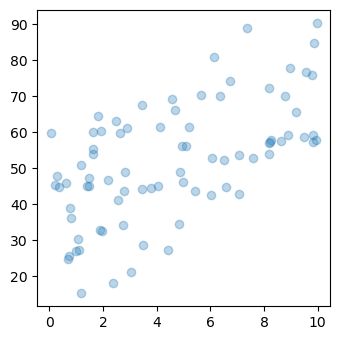

In [27]:
# Set the figure size
plt.rcParams["figure.figsize"] = [3.5, 3.5]
#plt.rcParams["figure.autolayout"] = True


# Scatter plot
plt.scatter(Xt[:, 0], yt, marker = 'o',alpha = 0.3)



# emd

In [28]:
Xs_ = np.append(Xs, ys.reshape(Xs.shape[0], 1), axis = 1)
Xt_ = np.append(Xt, yt.reshape(Xt.shape[0], 1), axis = 1)

#mass
u1 = np.array([1/n_s for _ in range(n_s)])
u2 = np.array([1/n_t for _ in range(n_t)])

In [29]:
#cost matrix
M = da.cost_matrix(Xs_, Xt_)

#coupling matrix
coupling = da.emd(M, u1, u2).x.reshape((n_s, n_t))

#transported samples
transported = n_s * coupling @ Xt_

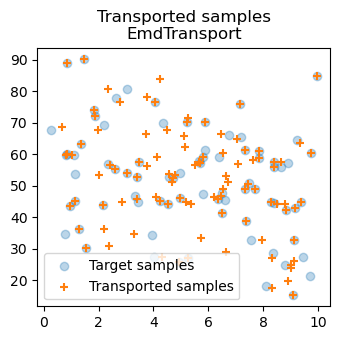

In [30]:
#figure
plt.scatter(Xt[:, 5], yt, marker='o',
           label='Target samples', alpha=0.3)
plt.scatter(transported[:, 5], transported.T[-1],
           marker='+', label='Transported samples')

plt.title('Transported samples\nEmdTransport')
plt.legend(loc="lower left")



In [31]:
#Final data
data = np.append(Xt_, transported, axis = 0)
data.shape

(180, 8)

# subset selection 

In [32]:
Y = data.T[-1]
X = np.delete(data, p_s, axis = 1)

In [33]:
# Using set_printoptions
np.set_printoptions(suppress=True)


In [34]:
#full features Linear Regression
F = LinearRegression(fit_intercept = False)
F.fit(X, Y)
F.coef_ #[2.5, 1.2, 0.1, 3.8, 1, 2.2, 0.9]

array([ 3.04098814,  1.02473423,  0.02300273,  4.05206643,  1.39653357,
       -0.0560308 ,  1.24243043])

In [35]:
feas, rss = fs.fsfix(Y, X, 4)
feas.sort()
feas

[0, 3, 4, 6]

In [36]:
s = fs.fw_selec(Y, X)
s.sort()
s

[0, 1, 3, 4, 6]